In [18]:
%load_ext autoreload
%autoreload 2
from projet_etu import *
import matplotlib.pyplot as plt
import numpy as np

from utils.mltools import *
import pickle as pkl 
from sklearn.manifold import TSNE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
def pred(x):
    #retourner la meuilleur classe
    return np.argmax(x,axis=1)

datax = np.random.randn(20, 10)
datay = np.random.choice([-1, 1], 20, replace=True)

linear = Linear(20, 1)
conv1d = Conv1D(k_size=3, chan_in=1, chan_out=5, stride=1)
maxpool1D = MaxPool1D(k_size=2,stride=2) 
softmax = Softmax()
loss = CELogSoftmax()
flatten = Flatten()



net = Sequential([conv1d,
                  maxpool1D,
                  flatten,
                  linear,
                  softmax])
modele = Optim(net,loss,eps=1e-4)

modele.SGD(datax.reshape(20,10,-1),datay.reshape(-1,1),10,10)


def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

  0%|          | 0/10 [00:00<?, ?it/s]

Training completed.


In [ ]:
def encod_onehot(y):
    onehot = np.zeros((y.size,y.max()+1));
    onehot[np.arange(y.size),y]=1
    return onehot

# Load Data From USPS , directement pris depuis TME4
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx, alltrainy = load_usps(uspsdatatrain)
alltestx, alltesty = load_usps(uspsdatatest)
alltrainx, alltrainy = alltrainx[:5000],alltrainy[:5000]
alltestx, alltesty = alltestx[:5000],alltesty[:5000]
# taille couche
input = len(alltrainx[0])
out = len(np.unique(alltesty))
alltrainy = encod_onehot(alltrainy)
alltesty= encod_onehot(alltesty)
alltrainx = alltrainx.reshape(alltrainx.shape[0], alltrainx.shape[1], 1)
alltestx = alltestx.reshape(alltestx.shape[0], alltestx.shape[1], 1)
     

def pred(x):
    #retourner la meuilleur classe
    return np.argmax(x,axis=1)

score = []
iteration = 300
gradient_step = 1e-4
batch_size = 100
net = Sequential([Conv1D(3, 1, 32, stride=1),
                      MaxPool1D(2, 2),
                      Flatten(),
                      Linear(4064, 100),
                      ReLU(),
                      Linear(100, 10),
                      Softmax()
                      ])
optim1 = Optim(net, CELoss(), 1e-4)        

# moyenne,variance= optim1.SGD(alltrainx, alltrainy,batch_size,iteration,200)
optim1.SGD(alltrainx, alltrainy, test_train_split=False, batch_size=batch_size, epochs=200, verbose=False)

plot_net(optim1, alltrainx, alltrainy, net_type="multiclass", net_title="Usps multi-classification")


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
predict = optim1.net.predict(alltrainx)
predicts = np.argmax(predict, axis = 1)
print((np.where(predicts == alltrainy, 1, 0)).mean() )
print(alltrainy.shape)

In [26]:
print(alltrainy.shape)

(5000, 10)


5
4
9
3
0
3
1


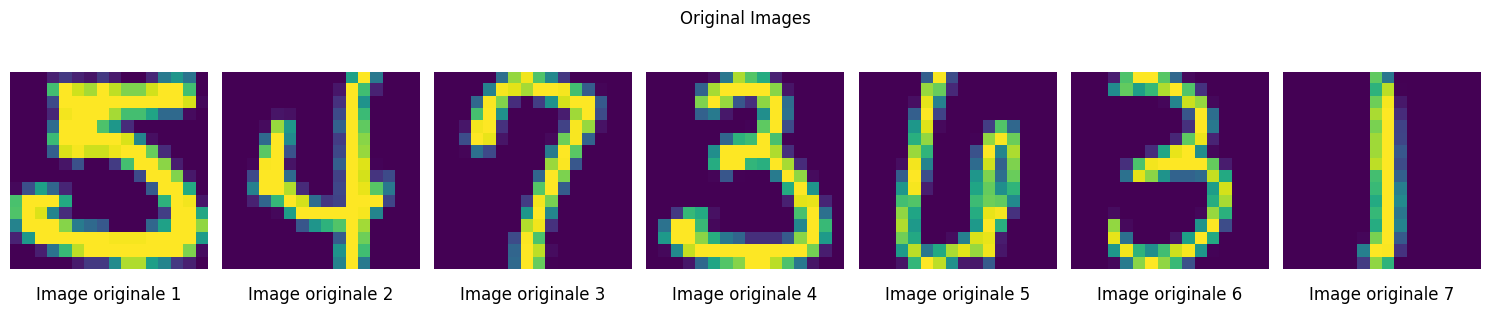

In [54]:
# indices = [1276, 508, 2791, 323, 1430, 2497, 1804]
indices = [1, 2, 3, 4, 5, 6, 7]

for ind in indices:
    print(predicts[ind])
plot_usps_predictions(alltrainx.reshape(-1, 16, 16), indices, originale=True, title="Original Images")

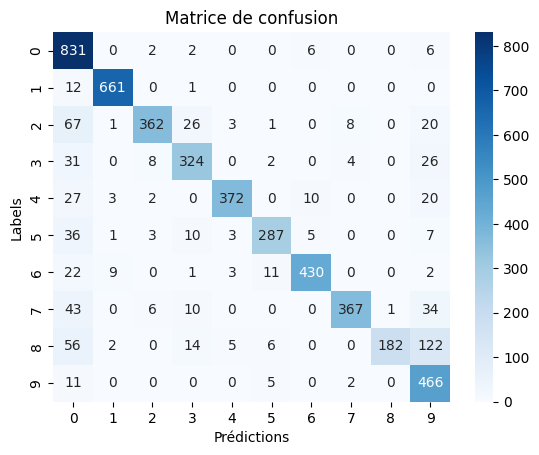

,precision,recall,f1-score,support
class,,,,
0,0.731514,0.98111,0.838124,847
1,0.976366,0.980712,0.978534,674
2,0.945170,0.741803,0.831228,488
3,0.835052,0.820253,0.827586,395
4,0.963731,0.857143,0.907317,434
5,0.919872,0.815341,0.864458,352
6,0.953437,0.899582,0.925727,478
7,0.963255,0.796095,0.871734,461
8,0.994536,0.470284,0.638596,387


In [56]:
classification_report(alltrainy,predicts,[f"{i}" for i in range(10)])

## Conv2D


In [ ]:
# plt.figure()
# plt.plot(moyenne,'black')
# plt.plot(variance,'blue')
# plt.legend(('Moyenne', 'Variance'))
# plt.show()

In [ ]:
alltrainx, alltrainy = load_usps(uspsdatatrain)
alltestx, alltesty = load_usps(uspsdatatest)
alltrainx, alltrainy = alltrainx[:1000],alltrainy[:1000]
alltestx, alltesty = alltestx[:1000],alltesty[:1000]

alltrainx=alltrainx.reshape(alltrainx.shape[0],16,16,1)
alltestx=alltestx.reshape(alltestx.shape[0],16,16,1)
     

predict = optim._net.predict(alltrainx)
print((np.where(predict == alltrainy, 1, 0)).mean() )

     


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def load_usps(fn):
    with open(fn, "r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split()) > 2]
    tmp = np.array(data)
    return tmp[:, 1:], tmp[:, 0].astype(int)

def encod_onehot(y):
    onehot = np.zeros((y.size, y.max() + 1))
    onehot[np.arange(y.size), y] = 1
    return onehot

# Load Data From USPS, directly taken from TME4
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx, alltrainy = load_usps(uspsdatatrain)
alltestx, alltesty = load_usps(uspsdatatest)

# Use only the first 1000 samples for training and testing
alltrainx, alltrainy = alltrainx[:1000], alltrainy[:1000]
alltestx, alltesty = alltestx[:1000], alltesty[:1000]

# Encode labels to one-hot
alltrainy = encod_onehot(alltrainy)
alltesty = encod_onehot(alltesty)

# Reshape data to fit Conv2D input requirements
alltrainx = alltrainx.reshape(alltrainx.shape[0], 16, 16, 1)
alltestx = alltestx.reshape(alltestx.shape[0], 16, 16, 1)

# Print shapes to verify
print("Reshaped train shape:", alltrainx.shape)
print("Reshaped test shape:", alltestx.shape)


Reshaped train shape: (1000, 16, 16, 1)
Reshaped test shape: (1000, 16, 16, 1)


In [30]:
def pred(x):
    return np.argmax(x, axis=1)

# Define the network
net = Sequential([
    Conv2D(3, 1, 32, stride=1),
    MaxPool2D(2, 2),
    Flatten(),
    Linear(32 * 7 * 7, 100),
    ReLU(),
    Linear(100, 10),
    Softmax()
])


# Initialize the optimizer
optim = Optim(net, CELoss(), eps=1e-3)

# Train the model
optim.SGD(alltrainx, alltrainy, test_train_split=False, batch_size=70, epochs=200, verbose=True)


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200 - Loss: 0.7436583445207962 - Score: 0.1965
Epoch 2/200 - Loss: 0.614369655531741 - Score: 0.1952
Epoch 3/200 - Loss: 0.4879643935472839 - Score: 0.2061
Epoch 4/200 - Loss: 0.4108239068971714 - Score: 0.2049
Epoch 5/200 - Loss: 0.36187718476096836 - Score: 0.2047
Epoch 6/200 - Loss: 0.3358170092011011 - Score: 0.2048
Epoch 7/200 - Loss: 0.30921187388719706 - Score: 0.2042
Epoch 8/200 - Loss: 0.3001651902354754 - Score: 0.2046
Epoch 9/200 - Loss: 0.2712848980819416 - Score: 0.2041
Epoch 10/200 - Loss: 0.2650286891512017 - Score: 0.2048
Epoch 11/200 - Loss: 0.24120352682743607 - Score: 0.2041
Epoch 12/200 - Loss: 0.2247851531872548 - Score: 0.2039
Epoch 13/200 - Loss: 0.22452780091156502 - Score: 0.2043
Epoch 14/200 - Loss: 0.2132214180122217 - Score: 0.2038
Epoch 15/200 - Loss: 0.20426726629844505 - Score: 0.2038
Epoch 16/200 - Loss: 0.2002525497290661 - Score: 0.2042
Epoch 17/200 - Loss: 0.1924760330364345 - Score: 0.2038
Epoch 18/200 - Loss: 0.19189768649097 - Score: 0.2043

Epoch 145/200 - Loss: 0.028629157321929527 - Score: 0.2037
Epoch 146/200 - Loss: 0.026815297311690404 - Score: 0.2037
Epoch 147/200 - Loss: 0.03147139319068068 - Score: 0.2037
Epoch 148/200 - Loss: 0.2900127443455135 - Score: 0.2037
Epoch 149/200 - Loss: 0.04241327843167455 - Score: 0.2037
Epoch 150/200 - Loss: 0.02450751587334352 - Score: 0.2037
Epoch 151/200 - Loss: 0.02518890606481063 - Score: 0.2037
Epoch 152/200 - Loss: 0.02772549823011157 - Score: 0.2037
Epoch 153/200 - Loss: 0.023699747229866466 - Score: 0.2037
Epoch 154/200 - Loss: 0.024630402303728174 - Score: 0.2037
Epoch 155/200 - Loss: 0.02564259736175353 - Score: 0.2037
Epoch 156/200 - Loss: 0.026163574561362483 - Score: 0.2037
Epoch 157/200 - Loss: 0.02645985099426293 - Score: 0.2037
Epoch 158/200 - Loss: 0.026656082086554265 - Score: 0.2037
Epoch 159/200 - Loss: 0.024024688038800614 - Score: 0.2037
Epoch 160/200 - Loss: 0.026082601950942162 - Score: 0.2037
Epoch 161/200 - Loss: 0.02362410912630425 - Score: 0.2037
Epoch 1

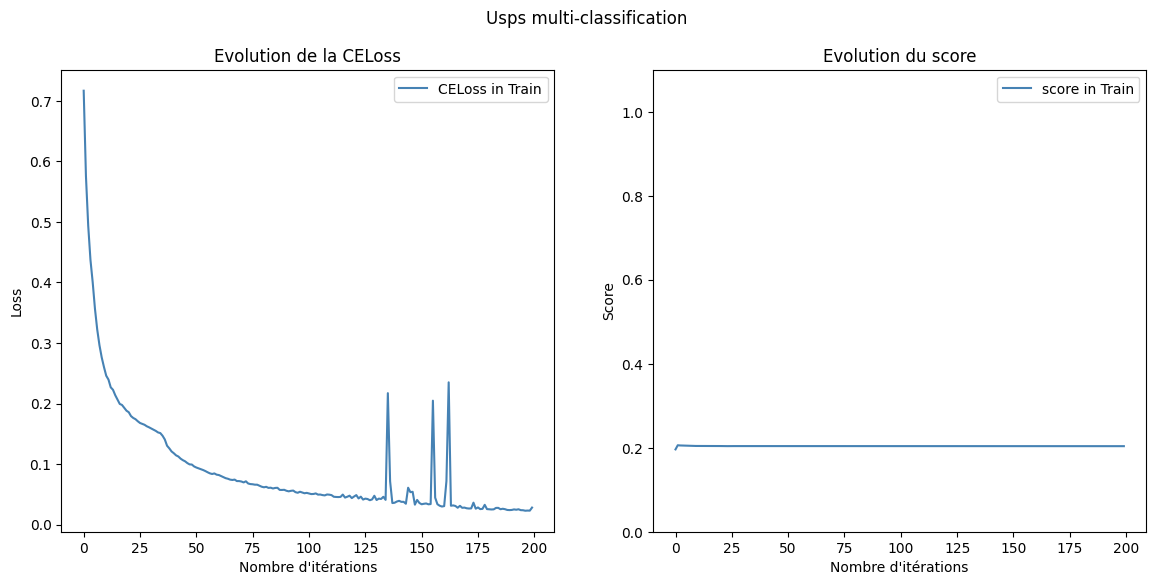

In [20]:
plot_net(optim, alltrainx, alltrainy, net_type="multiclass", net_title="Usps multi-classification")


In [37]:
predict = optim.net.predict(alltrainx)
print((np.where(predict == alltrainy, 1, 0)).mean() )

0.9997


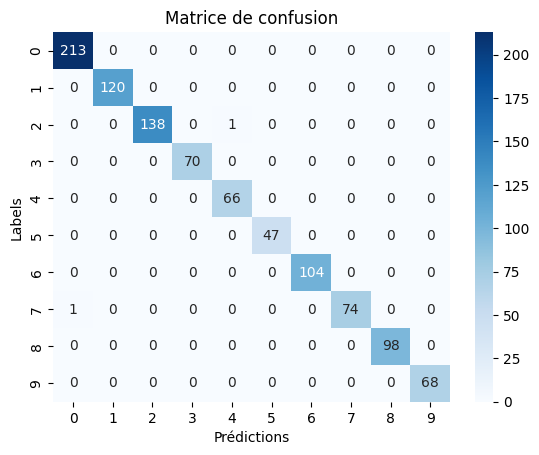

,precision,recall,f1-score,support
class,,,,
0,0.995327,1.0,0.997658,213
1,1.000000,1.0,1.0,120
2,1.000000,0.992806,0.99639,139
3,1.000000,1.0,1.0,70
4,0.985075,1.0,0.992481,66
5,1.000000,1.0,1.0,47
6,1.000000,1.0,1.0,104
7,1.000000,0.986667,0.993289,75
8,1.000000,1.0,1.0,98


In [39]:
true_label = np.argmax(alltrainy,axis=1)
predict_label = np.argmax(predict,axis=1)

classification_report(true_label,predict_label,[f"{i}" for i in range(10)])

5
4
7
3
6
3
1


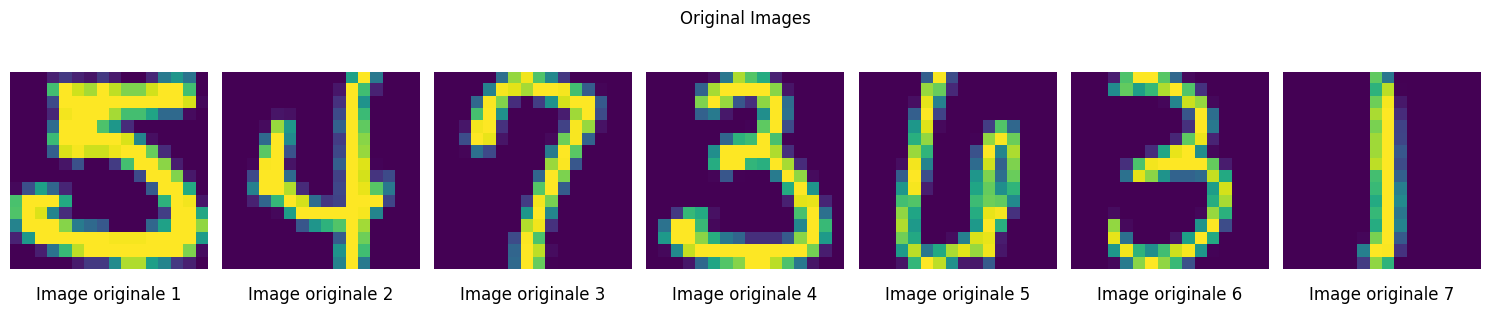

In [40]:
# indices = [1276, 508, 2791, 323, 1430, 2497, 1804]
indices = [1, 2, 3, 4, 5, 6, 7]

for ind in indices:
    print(predict_label[ind])
plot_usps_predictions(alltrainx.reshape(-1, 16, 16), indices, originale=True, title="Original Images")